# Customer Behaviour Analysis

## Import Libraries 

In [35]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy as stats

## Upload and Read the Dataset

In [17]:
df = pd.read_csv("C:/Users/sanji/OneDrive/Desktop/Customer Behaviours/shopping_trends.csv")

In [18]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Clean and Prepare the Data

In [19]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

## Understanding the dataset

In [20]:
df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [21]:
df.describe(include="all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Credit Card,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,696,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [46]:
# Skewness=Mean−Mode
skewness = (df["Purchase Amount (USD)"].mean() - df["Purchase Amount (USD)"].mode())
skewness

0    27.764359
1    23.764359
2   -34.235641
Name: Purchase Amount (USD), dtype: float64

## Exploratory Data Analysis (EDA)

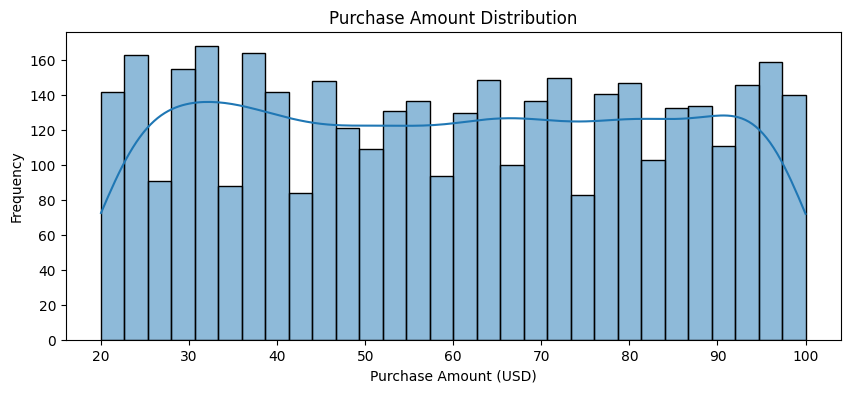

In [30]:
plt.figure(figsize=(10,4))
sns.histplot(df["Purchase Amount (USD)"], bins = 30, kde = True)
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

### Analyze Spending by Category

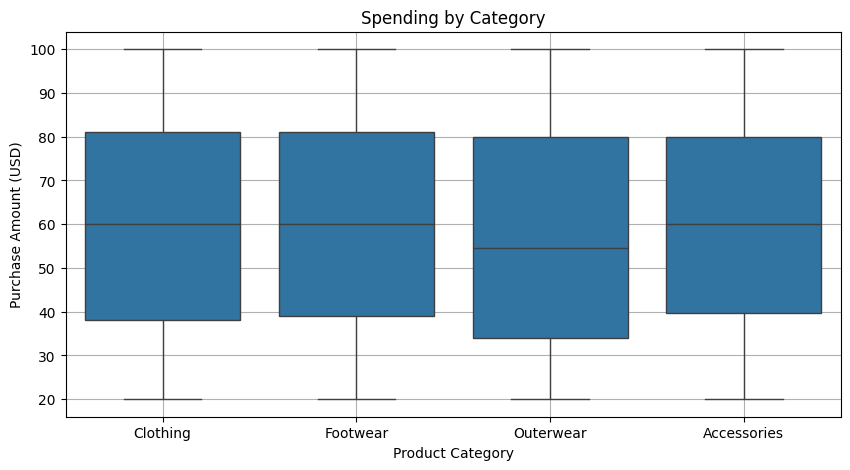

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.title('Spending by Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount (USD)')
plt.grid(True)
plt.show()

### Analyze Purchase Patterns by Category and Item
#### Determine the most popular 'Category' and 'Item Purchased' to identify top-selling products and product types.

In [95]:
print("Most Popular Categories:")
print(df['Category'].value_counts())

print("\nMost Popular Items Purchased:")
print(df['Item Purchased'].value_counts())

Most Popular Categories:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Most Popular Items Purchased:
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


### Analyze Purchase Amounts
#### Explore the distribution of 'Purchase Amount (USD)' and analyze its relation to 'Category' to understand spending habits across different product types.

In [96]:
print("\nAverage Purchase Amount (USD) by Category:")
print(df.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False))


Average Purchase Amount (USD) by Category:
Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


### Visualize Customer Behavior

C:\Users\sanji\AppData\Local\Temp\ipykernel_22328\2991811686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')


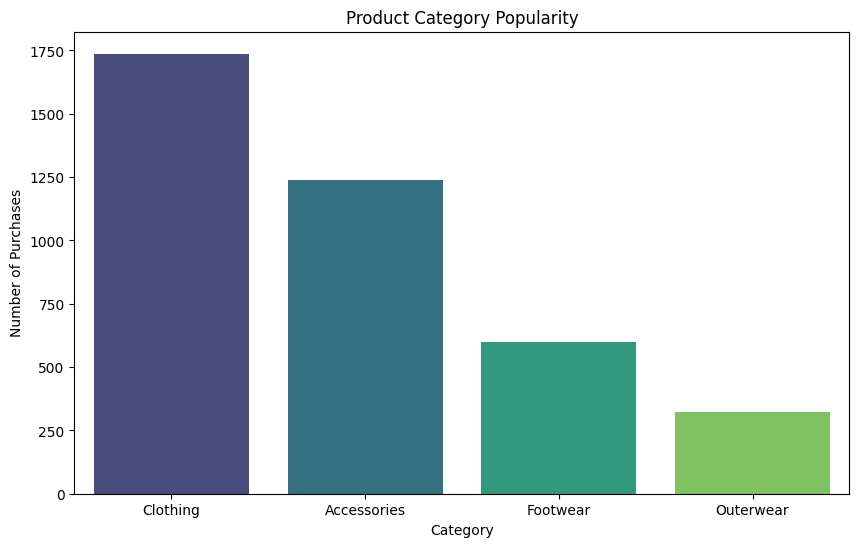

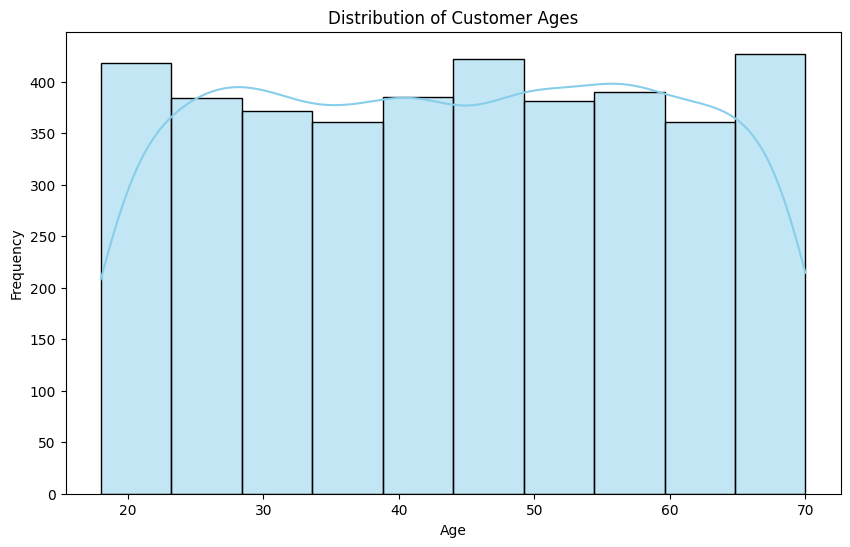

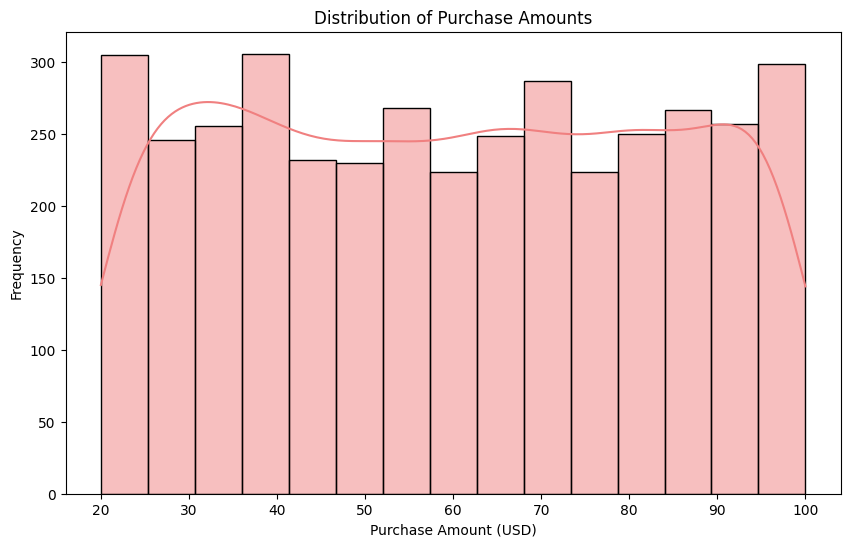

C:\Users\sanji\AppData\Local\Temp\ipykernel_22328\2991811686.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_purchase_by_season.index, y=average_purchase_by_season.values, palette='plasma')


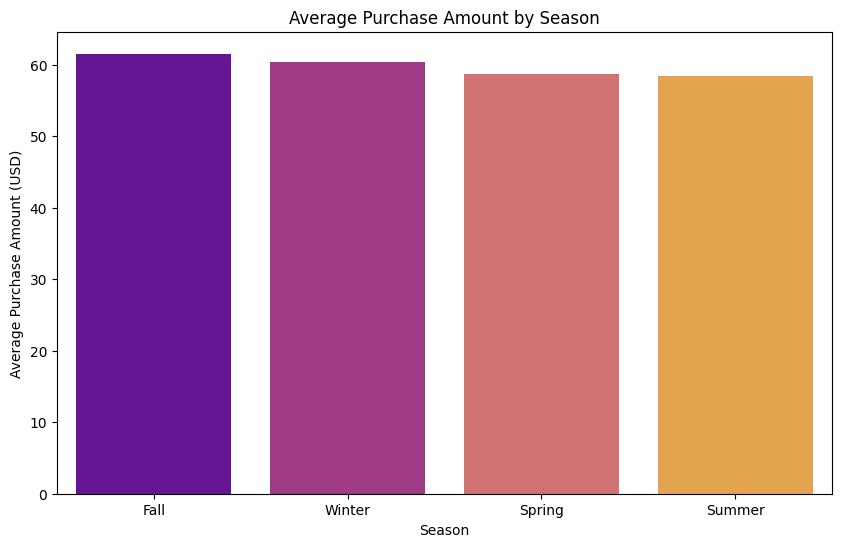

In [101]:
# 1. Bar plot for Category Popularity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title('Product Category Popularity')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.show()

# 2. Histogram for Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Histogram for Purchase Amount (USD) Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], bins=15, kde=True, color='lightcoral')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

# 4. Bar plot for Average Purchase Amount by Season
average_purchase_by_season = df.groupby('Season')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_purchase_by_season.index, y=average_purchase_by_season.values, palette='plasma')
plt.title('Average Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

### Gender-Based Purchase Comparison (Hypothesis Testing)
#### Testing if gender affects spending.

In [42]:
from scipy import stats
import scipy.stats as stats

In [52]:
#Group Data
male = df[df['Gender'] == 'Male']['Purchase Amount (USD)']
female = df[df['Gender'] == 'Female']['Purchase Amount (USD)']

In [53]:
#Independent t-test
_, p_value = stats.ttest_ind(a=male, b=female,equal_var=False)

In [54]:
if p_value < 0.05:
    print("That means gender affecting spending.")
else:
    print("That means gender doesn't affect spending.")

That means gender doesn't affect spending.


### Correlation Analysis
#### Measure relationship between age & spending.

In [91]:
df[['Age', 'Purchase Amount (USD)']].corr()

,Age,Purchase Amount (USD)
Age,1.000000,-0.010424
Purchase Amount (USD),-0.010424,1.000000


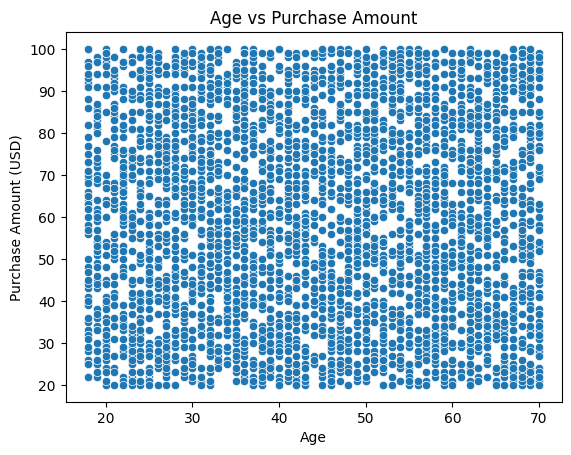

In [92]:
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df)
plt.title("Age vs Purchase Amount")
plt.show()

### Business Insights (MOST IMPORTANT)
#### Estimate true population mean.

In [93]:
mean = df['Purchase Amount (USD)'].mean()
std = df['Purchase Amount (USD)'].std()
n = len(df)

confidence = 0.95
z = stats.norm.ppf(1 - (1 - confidence) / 2)

lower = mean - z * (std / np.sqrt(n))
upper = mean + z * (std / np.sqrt(n))

(lower, upper)

(np.float64(59.021003799812476), np.float64(60.50771414890548))

## Summary: